In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('heart.csv')

In [3]:
dataset.head(6)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

X = 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope  
Y= HeartDisease

In [6]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values  #chosing y as last column with all rows


In [7]:
print(X)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [8]:
print(Y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

##### Data Preprocessig phase

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
from sklearn.impute import KNNImputer

In [11]:
from sklearn.preprocessing import LabelEncoder
#defining object for each column seperately
le1= LabelEncoder()  #denote first index
le2= LabelEncoder()  
le6= LabelEncoder()  # denotes resting ecg and goes on
le8= LabelEncoder()
le10= LabelEncoder()



fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. 

In [12]:
#we are transforming this into the endcoded form

X[:,1] = le1.fit_transform(X[:,1])
X[:,2] = le2.fit_transform(X[:,2])
X[:,6] = le6.fit_transform(X[:,6])
X[:,8] = le8.fit_transform(X[:,8])
X[:,10] = le10.fit_transform(X[:,10])

In [13]:
print(X)

[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


see, it is encoded in the number form

In [14]:
## Splitting Data set into training and testing dataset
## 80 percent for training
## 20 percent for testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test  =  train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
print(X_train)

[[70 1 0 ... 1 2.0 1]
 [46 1 0 ... 1 1.5 1]
 [65 0 2 ... 0 0.8 2]
 ...
 [57 0 0 ... 0 0.0 2]
 [64 1 0 ... 1 4.0 0]
 [47 1 2 ... 0 0.0 2]]


In [17]:
print(X_test)

[[55 1 0 ... 0 0.1 1]
 [66 1 0 ... 0 0.4 1]
 [51 1 0 ... 0 0.0 1]
 ...
 [52 1 0 ... 0 0.0 2]
 [37 1 1 ... 0 0.0 2]
 [53 1 2 ... 1 0.0 1]]


In [18]:
print(Y_train)

[1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 0 1 

In [19]:
print(Y_test)

[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1]


In [20]:
## see Y_test is just 20% of Y_train

#####  Feature Scaling
we use feature scaling , see in the data there are some values like 70 and there are also some values 0,1,2 like...
so there is large variation in values
so in plotting the graph its very difficulty in plotting graph,
so if we pass into machine learning algorithm, then it will take lot of time and computation...
and also will not give good result..
so we perform feature scaling and transform dataset into definite range..


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc= StandardScaler()  ##instance of this class

In [23]:
## X values are having large variations 
## Y dont need bcz it already has values in the form of 0 and 1

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
print(X_train)

[[ 1.75354017  0.51740017 -0.82686398 ...  1.19939076  1.0553738
  -0.59357258]
 [-0.81787111  0.51740017 -0.82686398 ...  1.19939076  0.57784676
  -0.59357258]
 [ 1.21782949 -1.93273999  1.27683849 ... -0.83375663 -0.0906911
   1.0443307 ]
 ...
 [ 0.3606924  -1.93273999 -0.82686398 ... -0.83375663 -0.85473437
   1.0443307 ]
 [ 1.11068735  0.51740017 -0.82686398 ...  1.19939076  2.96548197
  -2.23147586]
 [-0.71072897  0.51740017  1.27683849 ... -0.83375663 -0.85473437
   1.0443307 ]]


In [26]:
print(X_test)

[[ 0.20230716  0.51017053 -0.77912558 ... -0.78360391 -0.66533939
  -0.60665455]
 [ 1.32722389  0.51017053 -0.77912558 ... -0.78360391 -0.40168731
  -0.60665455]
 [-0.20675347  0.51017053 -0.77912558 ... -0.78360391 -0.75322342
  -0.60665455]
 ...
 [-0.10448831  0.51017053 -0.77912558 ... -0.78360391 -0.75322342
   1.0846248 ]
 [-1.63846567  0.51017053  0.24486804 ... -0.78360391 -0.75322342
   1.0846248 ]
 [-0.00222316  0.51017053  1.26886166 ...  1.27615494 -0.75322342
  -0.60665455]]


we have completed preprocessing part upto here

##### Training Dataset

##### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model_logistic = LogisticRegression()  ## instance of the class

model_logistic.fit(X_train,Y_train)   ## we have to apply here curve fitting

#X_train we have written above bcz X is an independent variable
#Y_Train and Y is deep end variable

LogisticRegression()

##### SVM

In [29]:
## SVM

from sklearn.svm import SVC
model_svm = SVC()  #instance
model_svm.fit(X_train,Y_train)

SVC()

In [30]:
y_pred_logistic = model_logistic.predict(X_test)  ## bcz we are testing model on X_test


X_test are the parameters which are deciding Y_test

##### doing same with svm model ..
we are doing this just to ensure which of our model will give better accuracy 

In [31]:
y_pred_svm = model_svm.predict(X_test)

### KNeighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model_kneighbors = KNeighborsClassifier(n_neighbors=8)

In [33]:
model_kneighbors.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
y_pred_kneighbors = model_kneighbors.predict(X_test)

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [36]:
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [37]:
y_pred_tree = model_tree.predict(X_test)

###  Random  Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_random = RandomForestClassifier()

In [40]:
model_random.fit(X_train,Y_train)

RandomForestClassifier()

In [41]:
y_pred_random  = model_random.predict(X_test)

In [43]:
!pip install xgboost

### XGBoost

In [44]:
from xgboost import XGBClassifier

In [45]:
model_xg = XGBClassifier()

In [46]:
model_xg.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
y_pred_xg = model_xg.predict(X_test)

#### testing accuracy

In [48]:
from sklearn.metrics import accuracy_score   ## to calculate accuracy score

In [49]:
Logistic_Acc =  accuracy_score(Y_test,y_pred_logistic)  #Y_test is original value for X_test
SVM_Acc = accuracy_score(Y_test, y_pred_svm)

KNeighbors_Acc = accuracy_score(Y_test,y_pred_kneighbors)

In [50]:
Logistic_Acc

0.8369565217391305

In [51]:
SVM_Acc

0.8641304347826086

Accuracy of SVM model > Accuracy of Logistic Model

###### see this Logistic regression model is giving 83% accuracy  where as SVM mode is giving accuracy of 86%
similarily we have to perform for other machine learning algorithms to test their accuracy...  
now we will use support vector machine model  
   
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

##### testing for kneighbors accuracy

In [52]:
KNeighbors_Acc = accuracy_score(Y_test,y_pred_kneighbors)

In [53]:
KNeighbors_Acc

0.8478260869565217

###### seee far now we are getting maximum accuracy from SVM model

##### tetsing accuracy for decision tree model

In [54]:
model_tree_Acc = accuracy_score(Y_test,y_pred_tree)

In [55]:
model_tree_Acc

0.7391304347826086

##### testing accuracy for random forest model

In [56]:
Random_Acc = accuracy_score(Y_test,y_pred_random)
Random_Acc

0.8586956521739131

 #### testing accuracy for xg model

In [57]:
Xg_Acc = accuracy_score(Y_test,y_pred_xg)

In [58]:
print(Xg_Acc)

0.842391304347826


we can also increase the accuraccy for random forest , lets change the n_estimators whose default value is 100, changing it will take more computation and may take more time

##### again training model with random forst with n_estimators of 200

In [59]:
model_random = RandomForestClassifier(n_estimators=200)


In [60]:
model_random.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [61]:
y_pred_random  = model_random.predict(X_test)

Now testing the accuracy

In [62]:
Random_Acc = accuracy_score(Y_test,y_pred_random)
Random_Acc

0.8586956521739131

    SEE THE ACCURACY IS INCREASED

##### comparing accuracy of all the models

In [63]:
print(Logistic_Acc)
print(SVM_Acc)
print(KNeighbors_Acc)
print(model_tree_Acc)
print(Random_Acc)
print(Xg_Acc)

0.8369565217391305
0.8641304347826086
0.8478260869565217
0.7391304347826086
0.8586956521739131
0.842391304347826


###### according to the above accuracy here we will chose SVM , bcz we find it best suitable with best accuracy

now we will plot the bargraph

##### Plotting Accuracy of different ML Algorithm

Text(0, 0.5, 'Accuracy')

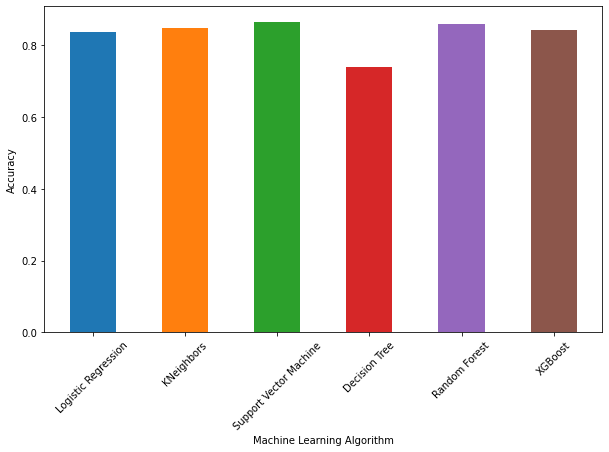

In [64]:
plt.figure(figsize=(10, 6))
plt.bar("Logistic Regression",Logistic_Acc,width=0.5)
plt.bar("KNeighbors",KNeighbors_Acc,width=0.5)
plt.bar("Support Vector Machine",SVM_Acc,width=0.5)
plt.bar("Decision Tree",model_tree_Acc,width=0.5)
plt.bar("Random Forest",Random_Acc,width=0.5)
plt.bar("XGBoost",Xg_Acc,width=0.5)
plt.xlabel("Machine Learning Algorithm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")

#### Single Prediction

In [65]:
dataset.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [66]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [67]:
print(X[916])

[57 0 1 130 236 0 0 174 0 0.0 1]


In [68]:
print(X[247])

[48 1 0 122 275 1 2 150 1 2.0 0]


##### Age = 50, Sex = 0 (for female 0 and for male is 1), chestpain=0(ASY)
##### cholestrol = 250, FastingBloodSugar= 1,  RestingECG =2 (ST),   MaxHR = 175 ,ExerciseAngina = 1(Yes),
##### oldpeak = 1.9 , ST_Slope = (Down) 0

above parameters we will use for single prediction we will enter these values

In [74]:
Age = input('Enter the Age: ')
Sex = input('Enter the Gender\n(For female Enter 0 and for male Enter 1):\n ')
ChestPainType= input('Enter the ChestPainType:\n Enter 0 for ASY: \n Enter 1 for ATA:\n Enter 1 for NAP: \n Enter 1 for TA: \n')
RestingBP = input('Enter RestingBP:\n ')
Cholestrol = input('Enter the Cholestrol value \n')
FastingBS = input('Enter the Fasting Blood Sugar \n')
RestingECG = input('Enter the Resting Electrocardiogram (ECG): \n Type 0 for LVH \n Type 1 for Normal \n Type 2 for ST \n ')
MaxHR = input('Enter the MaxHR: \n ')
ExerciseAngina= input('Enter the ExerciseAngina: \n Type 1 if Yes \n Type 0 if No \n')
Oldpeak = input('Enter the value of Oldpeak: (Type the value in decimal)  \n')
ST_Slope = input('Enter the value of ST_Slope: \n Type 0 if down: \n Type 1 if flat \n Type 2 if up \n')

Enter the Age: 


KeyboardInterrupt: Interrupted by user

In [88]:
result= model_svm.predict(sc.transform([[Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope]]))
if result == [0]:
    print("Person is not having any heart disease")
else:
    print("Person is having heart disease")

Person is having heart disease
